<a href="https://colab.research.google.com/github/Maria-Miroshnikova/pm-pu/blob/main/python/anime_abd_graphic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tempur

<function matplotlib.pyplot.show>

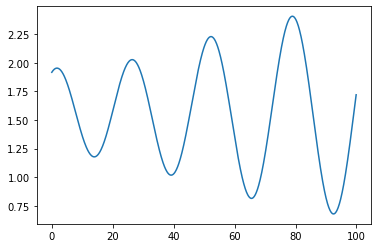

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import math

# graphic

t = np.arange(0,100,0.1)
temperature = np.arctan(-0.0012 * t ** 3 + 0.4 * t ** 2 + 0.616 * t + 6120) + 0.65 * np.sin(0.24 * t + 1.23) - 0.27 * np.cos(0.21 * t - 0.17) - (np.sin(0.34 * t + 0.16)) / (1 + 0.03 * (t - 370.5) ** 2)
plt.plot(t, temperature)
plt.show

anime

In [2]:
# 1, 2
import pandas as pd

data = pd.read_csv("anime.csv")#, sep=";")
for i in range(3):
  print(data.loc[i])
  print('------')

Title                   Shingeki no Kyojin
Production                      Wit Studio
Episodes                                25
Source                               Manga
Genre         Action,Drama,Fantasy,Mystery
Airdate           Apr 7, 2013, 01:58 (JST)
Rating                                8.52
Voters                           3,142,121
Theme                 Military,Super Power
Name: 0, dtype: object
------
Title              Fullmetal Alchemist: Brotherhood
Production                                    Bones
Episodes                                         64
Source                                        Manga
Genre         Action,Adventure,Comedy,Drama,Fantasy
Airdate                    Apr 5, 2009, 17:00 (JST)
Rating                                         9.16
Voters                                    2,676,911
Theme                                      Military
Name: 1, dtype: object
------
Title                         Sword Art Online
Production                        A-1 

In [3]:
# 3

column_names = data.columns
for name in column_names:
  print("{} : {}".format(name, pd.api.types.infer_dtype(data[name])))

Title : string
Production : string
Episodes : string
Source : string
Genre : string
Airdate : string
Rating : floating
Voters : string
Theme : string


In [4]:
# 4
for name in column_names:
  data.rename(columns = { name : name.lower()}, inplace=True)
column_names = data.columns
for name in column_names:
  print("{} : {}".format(name, data[name].dtype))
numerical = set({'episodes', 'airdate', 'rating', 'voters'})
categorical = set(column_names) - numerical
#print(categorical)

title : object
production : object
episodes : object
source : object
genre : object
airdate : object
rating : float64
voters : object
theme : object


In [5]:
# 5
for column in numerical:
  print(data[column].describe())
  print('------')

count    1944.000000
mean        7.150849
std         0.709454
min         2.960000
25%         6.720000
50%         7.210000
75%         7.590000
max         9.160000
Name: rating, dtype: float64
------
count             1020
unique             960
top       ??? ??, ????
freq                13
Name: airdate, dtype: object
------
count      1992
unique     1978
top       8,986
freq          2
Name: voters, dtype: object
------
count     1992
unique     100
top          1
freq       625
Name: episodes, dtype: object
------


In [6]:
# 6
for column in categorical:
  print(data[column].value_counts())
  print('-----')

Shounen                                    179
Super Power                                163
-                                          134
Mecha                                       85
School                                      83
                                          ... 
Military,Super Power,Vampire                 1
Mecha,Military,Music,School,Space            1
Bandai Entertainment,Central Park Media      1
Netflix,Sentai Filmworks                     1
Demons,Mecha                                 1
Name: theme, Length: 170, dtype: int64
-----
Action,Sci-Fi                       138
Action                              100
Action,Adventure,Fantasy             97
Action,Adventure,Comedy,Fantasy      90
Action,Drama,Sci-Fi                  88
                                   ... 
Action,Fantasy,Horror                 1
Action,Adventure,Mystery,Sci-Fi       1
Action,Adventure,Ecchi                1
Action,Mystery,Sci-Fi,Suspense        1
Action,Comedy,Drama,Sci-Fi,Ecchi      

In [7]:
# 7

#data_filled = data.fillna(data.mean())
#print(data_filled)

In [21]:
#8
companies = data['production'].unique()
company_anime_stat_dict = dict()
for company in companies:
   company_anime_stat_dict[company] = set()
for i in range(data.shape[0]):
  company = data.loc[i]['production']
  anime = data.loc[i]['title']
  company_anime_stat_dict[company].add(anime)
#for company, anime_set in company_anime_stat_dict.items():
#  print("{} : {}".format(company, len(anime_set)))

[('Science SARU', 1), ('TROYCA', 1), ('Pine Jam', 1), ('Maho Film', 1), ('EKACHI EPILKA', 1), ('Studio Colorido', 1), ('Shin-Ei Animation', 1), ('ENGI', 1), ('Namu Animation', 1), ("Children's Playground Entertainment", 1), ('XEBEC M2', 1), ('Lapin Track', 1), ('Creators in Pack', 1), ('China Literature Limited', 1), ('Bakken Record', 1), ('Tsuchida Productions', 1), ('Visual Flight', 1), ('A-Real', 1), ('Blade', 1), ('l-a-unch・BOX', 1), ('LandQ studios', 1), ('Minami Machi Bugyousho', 1), ('Shirogumi', 1), ('Studio Animal', 1), ('Kamikaze Douga', 1), ('Fifth Avenue', 1), ('G&G Entertainment', 1), ('Anima&Co.', 1), ('Nakamura Production', 1), ('The Answer Studio', 1), ('Nice Boat Animation', 1), ('View Works', 1), ('Think Corporation', 1), ('L²Studio', 1), ('Yumeta Company', 1), ('Yokohama Animation Lab', 1), ('CyberConnect2', 1), ('Kitty Film Mitaka Studio', 1), ('Studio Kai', 1), ('Tokyo Kids', 1), ('TAKI Corporation', 1), ('Craftar Studios', 1), ('Studio Flag', 1), ('CoMix Wave Film

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


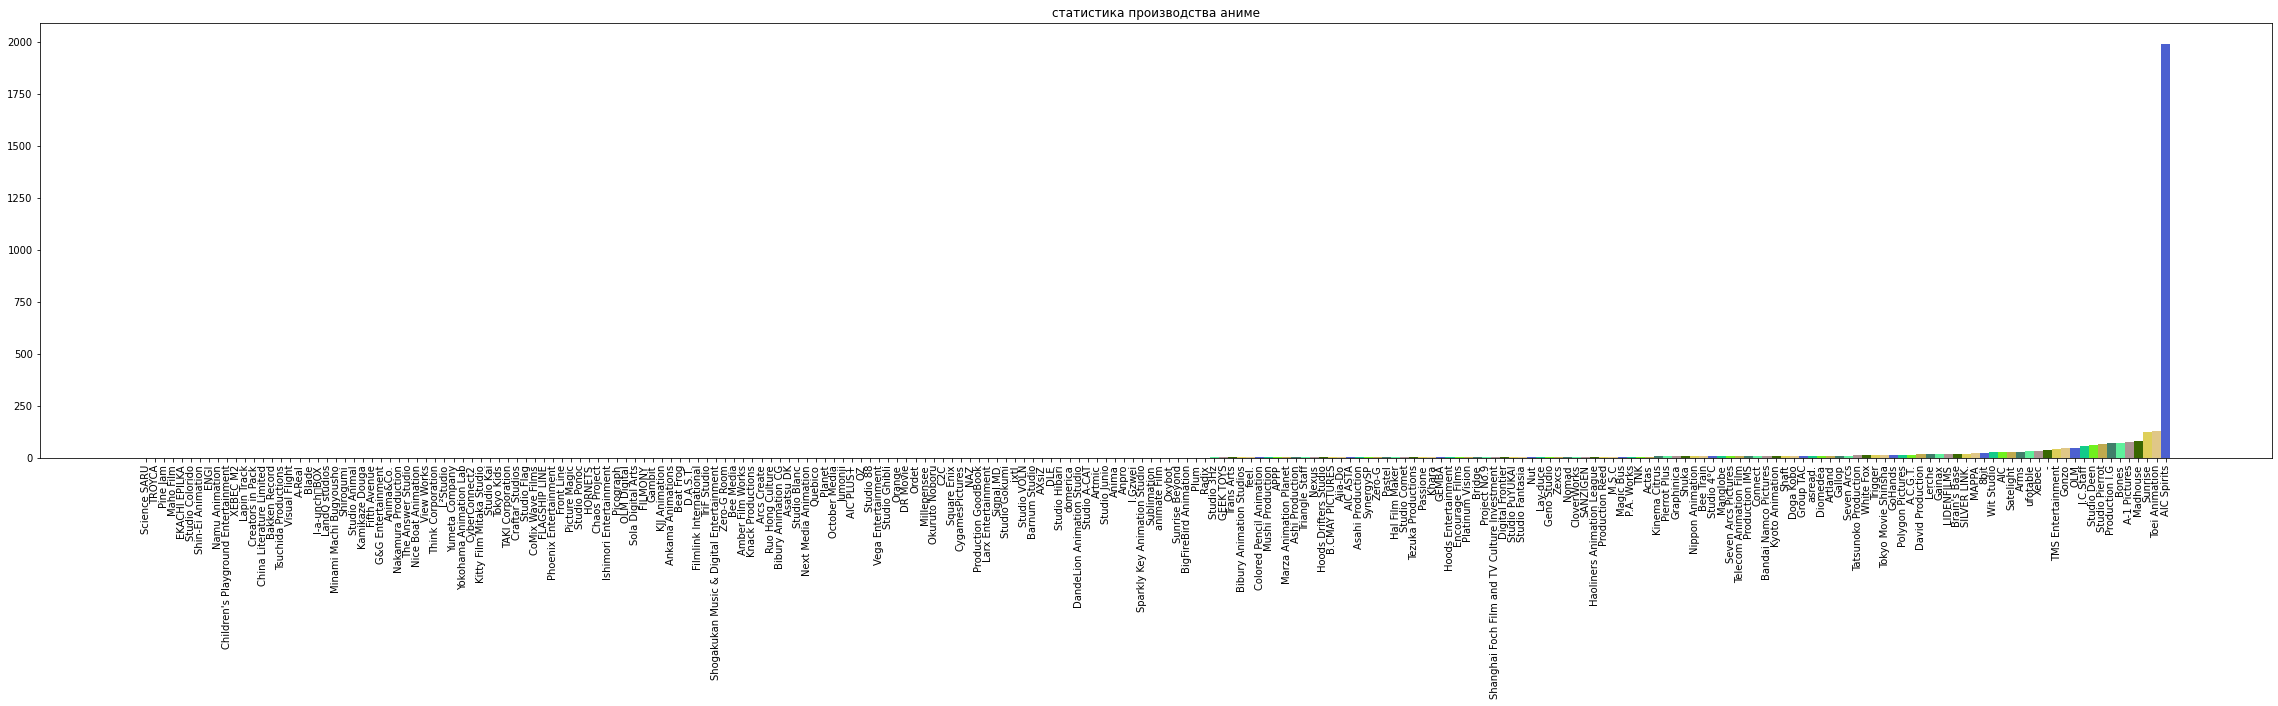

In [129]:
import matplotlib.pyplot as plt

company_count_dict = dict()
for company, anime_set in company_anime_stat_dict.items():
  company_count_dict[company] = len(anime_set)

company_count_dict_sorted = sorted(company_count_dict.items(), key=lambda item: item[1])
print(company_count_dict_sorted)
company_list = list()
count_list = list()
for i in company_count_dict_sorted:
  company_list.append(i[0])
  count_list.append(i[1])


#indexes = np.arange(len(company_count_dict))
#print(indexes)
#print(company_count_dict.values())
#plt.bar(indexes, list(company_count_dict.values()))
#plt.xticks(list(company_count_dict.keys()))
#plt.show()

c = np.random.rand(10,3)
fig = plt.figure(figsize=(40,8))
plt.bar(company_list, count_list, width=1, color=c)
plt.title("статистика производства аниме")
plt.xticks(rotation=90)
plt.show()

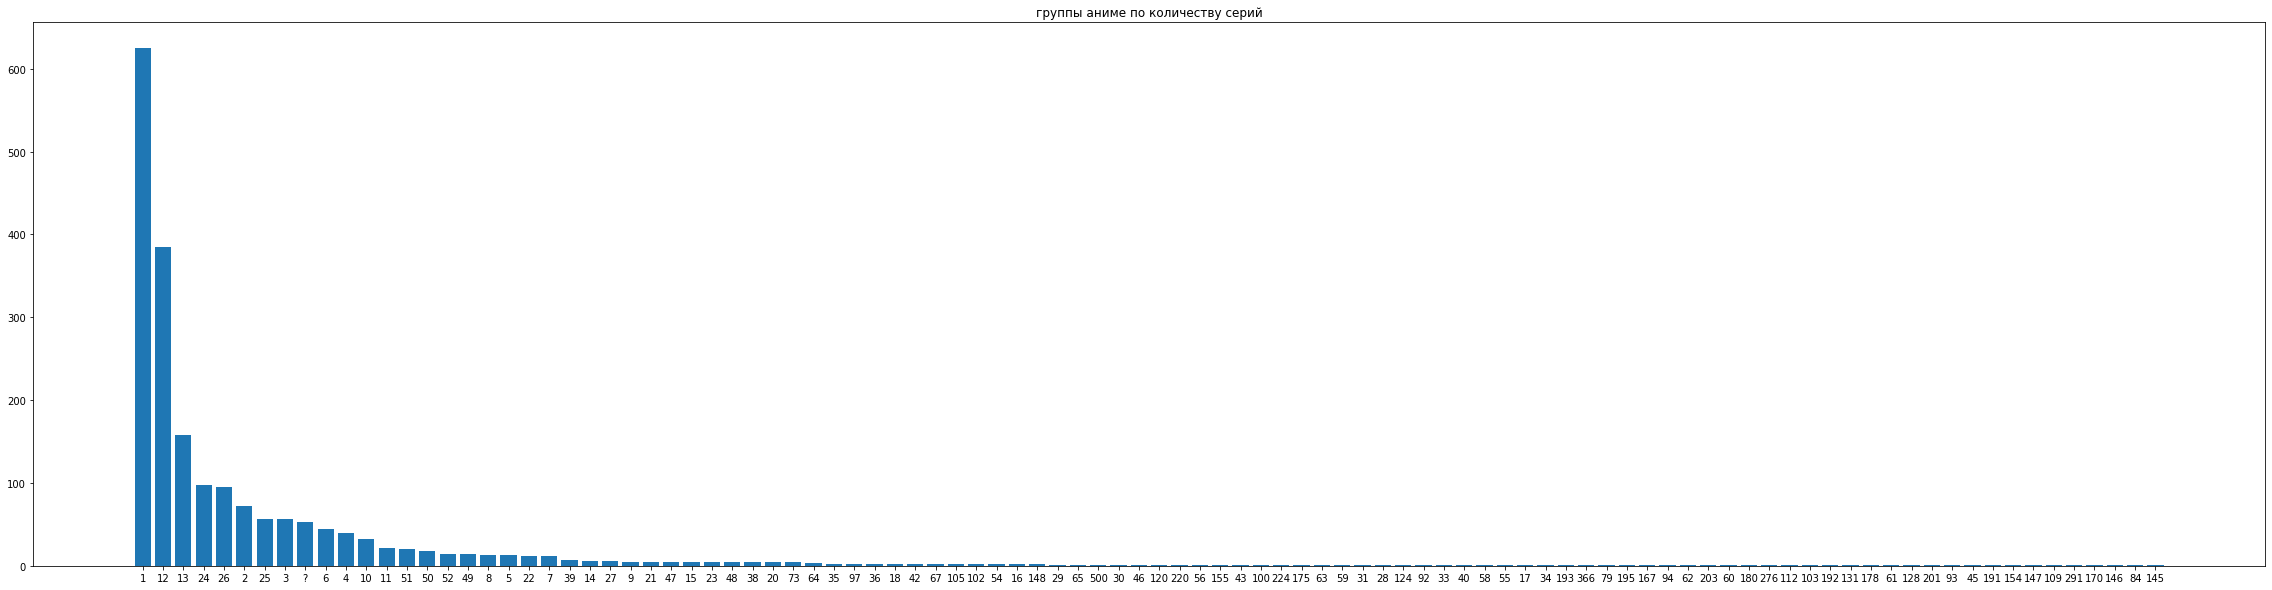

In [128]:
#data['episodes'].value_counts()
count_of_series = data['episodes'].value_counts().keys()
group_with_this_count = data['episodes'].value_counts().values
#print(count_of_series)
#print(group_with_this_count)
fig = plt.figure(figsize=(40,10))
plt.bar(count_of_series, group_with_this_count)
plt.title("группы аниме по количеству серий")
plt.show()
#print(data['episodes'] == 1)

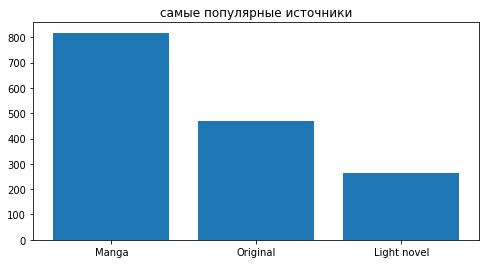

In [126]:
most_popular = data['source'].value_counts()
most_3 = most_popular[:3]
fig = plt.figure(figsize=(8,4))
plt.bar(most_3.keys(), most_3.values)
plt.title("самые популярные источники")
plt.show()
#print(most_3)

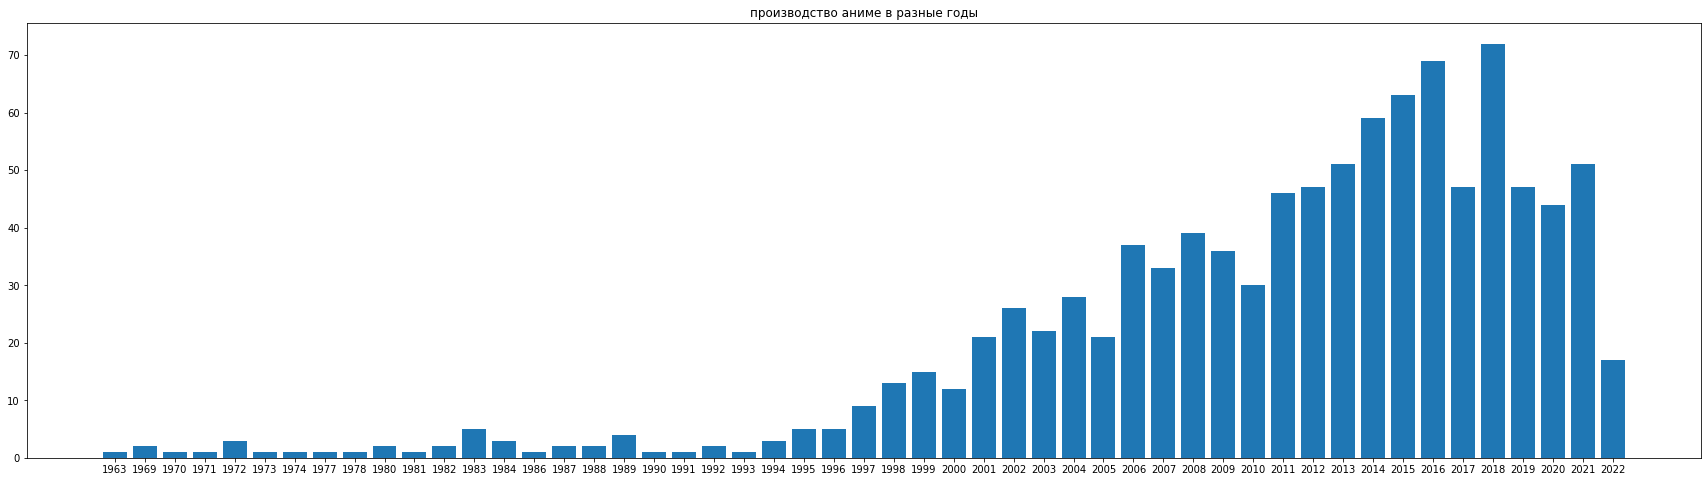

In [125]:
import re

regex_year = re.compile('\d{4}')
#print(regex_year.findall(data['airdate'][3]))
years = list()
year_default = "0"
for i in range(data.shape[0]):
  date = str(data['airdate'][i])
  found_year = regex_year.findall(date)
  if len(found_year) > 0:
    years.append(found_year[0])
  else:
    years.append(year_default)
#print(years)
#name = 'year'
data = data.assign(year = years)
#print(new_data)
year_anime_count = data['year'].value_counts()
year_anime_count = (year_anime_count.sort_index())
year_anime_count = year_anime_count.drop(year_anime_count.index[0])
#print(year_anime_count)
fig = plt.figure(figsize=(30,8))
plt.bar(year_anime_count.keys(), year_anime_count.values)
plt.title("производство аниме в разные годы")
plt.show()